In [1]:
# 常用机器学习模型

In [42]:
## Default Dict

In [1]:
from collections import defaultdict
dict1 = defaultdict(int)
dict2 = defaultdict(set)
dict3 = defaultdict(str)
dict4 = defaultdict(list)
print(dict1[1])
print(dict2[1])
print(dict3[1])
print(dict4[1])

0
set()

[]


In [2]:
## NORMDIST

In [3]:
from scipy import stats
mu = 179.5
sigma = 3.697
x = 180
prob = stats.norm.pdf(x, mu, sigma)
print(prob)

import numpy as np
print(np.log2(0.4))
print(np.log2(0.2))

0.10692733469896672
-1.3219280948873622
-2.321928094887362


In [4]:
## Mall Customer聚类

In [5]:
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import warnings
warnings.filterwarnings('ignore')
path = os.path.expanduser('~/data/')

In [6]:
# 数据加载
data = pd.read_csv(path + '/BI/Mall_Customers.csv', encoding='gbk')
train_x = data[["Gender","Age","Annual Income (k$)", "Spending Score (1-100)"]]

In [7]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_x['Gender'] = le.fit_transform(train_x['Gender'])
"""
# 规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
#print(train_x)
"""
model = AgglomerativeClustering(linkage='ward', n_clusters=3)
y = model.fit_predict(train_x)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


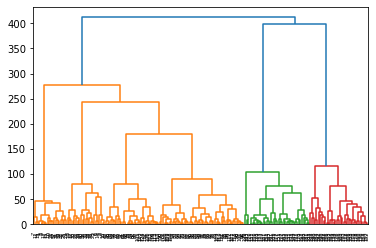

In [8]:
linkage_matrix = ward(train_x)
dendrogram(linkage_matrix)
plt.show()

In [9]:
### kmeans

In [10]:
# coding: utf-8
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np

In [11]:
train_x = data[["Gender","Age","Annual Income (k$)", "Spending Score (1-100)"]]

In [12]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_x['Gender'] = le.fit_transform(train_x['Gender'])

In [13]:
# 规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
# pd.DataFrame(train_x).to_csv('temp.csv', index=False)
#print(train_x)

In [14]:
# 使用KMeans聚类
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)
# 合并聚类结果，插入到原数据中
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)
print(result)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  聚类结果
0             1    Male   19                  15                      39     2
1             2    Male   21                  15                      81     2
2             3  Female   20                  16                       6     0
3             4  Female   23                  16                      77     0
4             5  Female   31                  17                      40     0
..          ...     ...  ...                 ...                     ...   ...
195         196  Female   35                 120                      79     0
196         197  Female   45                 126                      28     0
197         198    Male   32                 126                      74     2
198         199    Male   32                 137                      18     1
199         200    Male   30                 137                      83     2

[200 rows x 6 columns]


In [15]:
# 将结果导出到CSV文件中
# result.to_csv("customer_cluster_result.csv",index=False)

In [16]:
## MNIST手写数字分类（多种分类方法）

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [18]:
# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


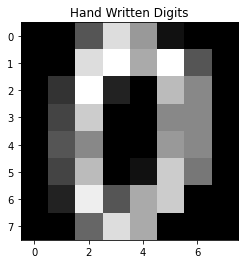

In [19]:
# 将第一幅图像显示出来
plt.gray()
plt.title('Hand Written Digits')
plt.imshow(digits.images[0])
plt.show()

In [20]:
# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

In [21]:
# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [22]:
# 创建LR分类器
model = LogisticRegression()
#model.fit(train_ss_x, train_y)
model.fit(train_x, train_y)
#predict_y=model.predict(test_ss_x)
predict_y=model.predict(test_x)
print('LR准确率: %0.4lf' % accuracy_score(predict_y, test_y))

LR准确率: 0.9556


In [23]:
# 创建GaussianNB分类器
model = GaussianNB()
model.fit(train_x, train_y)
predict_y=model.predict(test_x)
print('GaussianNB准确率: %0.4lf' % accuracy_score(predict_y, test_y))
print(model.class_prior_)
print(model.class_count_)
print(model.theta_)
print(model.sigma_)

GaussianNB准确率: 0.8311
[0.10616184 0.09502598 0.09873794 0.1017075  0.10838901 0.09948033
 0.09651076 0.10690423 0.0861173  0.10096511]
[143. 128. 133. 137. 146. 134. 130. 144. 116. 136.]
[[0.00000000e+00 1.39860140e-02 3.97202797e+00 1.30979021e+01
  1.12447552e+01 2.83916084e+00 3.49650350e-02 0.00000000e+00
  0.00000000e+00 7.48251748e-01 1.23286713e+01 1.36083916e+01
  1.16013986e+01 1.12727273e+01 9.44055944e-01 0.00000000e+00
  0.00000000e+00 3.67132867e+00 1.42867133e+01 5.35664336e+00
  2.12587413e+00 1.22587413e+01 3.47552448e+00 0.00000000e+00
  0.00000000e+00 5.26573427e+00 1.26993007e+01 2.09790210e+00
  1.46853147e-01 9.10489510e+00 6.42657343e+00 0.00000000e+00
  0.00000000e+00 5.86713287e+00 1.16573427e+01 9.51048951e-01
  5.59440559e-02 8.70629371e+00 7.12587413e+00 0.00000000e+00
  0.00000000e+00 3.49650350e+00 1.33706294e+01 1.66433566e+00
  1.45454545e+00 1.12797203e+01 5.92307692e+00 0.00000000e+00
  0.00000000e+00 7.27272727e-01 1.29720280e+01 1.00839161e+01
  1.037

In [24]:
# 创建MultinomialNB分类器
model = MultinomialNB()
model.fit(train_x, train_y)
predict_y=model.predict(test_x)
print('MultinomialNB准确率: %0.4lf' % accuracy_score(predict_y, test_y))
print(model.class_log_prior_)
print(model.intercept_)
print(model.feature_log_prob_)
print(model.coef_)
print(model.class_count_)
print(model.feature_count_)
#print(model.feature_count_)


MultinomialNB准确率: 0.8933
[-2.24279055 -2.35360491 -2.31528605 -2.28565425 -2.22202855 -2.30779538
 -2.33810073 -2.23582188 -2.45204499 -2.29298029]
[-2.24279055 -2.35360491 -2.31528605 -2.28565425 -2.22202855 -2.30779538
 -2.33810073 -2.23582188 -2.45204499 -2.29298029]
[[-10.72181258  -9.62320029  -4.37793215  -3.18598212  -3.33844443
   -4.7129994   -8.93005311 -10.72181258 -10.72181258  -6.03968135
   -3.24647335  -3.14776758  -3.3072397   -3.3359615   -5.8091577
  -10.72181258 -10.72181258  -4.45651137  -3.09914863  -4.07932578
   -5.00150081  -3.25215841  -4.5112125  -10.72181258 -10.72181258
   -4.09642021  -3.21687051  -5.01470232  -7.63077013  -3.549388
   -3.89743891 -10.72181258 -10.72181258  -3.98841069  -3.302432
   -5.80183166  -8.524588    -3.59411888  -3.79425468 -10.72181258
  -10.72181258  -4.50520648  -3.16538461  -5.24534903  -5.37947833
   -3.33534173  -3.97893195 -10.72181258 -10.72181258  -6.06785223
   -3.19563367  -3.44733302  -3.41931616  -3.16800173  -4.846881

In [25]:
# 创建BernoulliNB分类器
model = BernoulliNB()
model.fit(train_x, train_y)
predict_y=model.predict(test_x)
print('BernoulliNB准确率: %0.4lf' % accuracy_score(predict_y, test_y))

BernoulliNB准确率: 0.8444


In [26]:
# 创建决策树分类器
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
predict_y=model.predict(test_x)
print('决策树准确率: %0.4lf' % accuracy_score(predict_y, test_y))

决策树准确率: 0.8533


In [27]:
# 创建随机森林分类器
model = RandomForestClassifier()
model.fit(train_x, train_y)
predict_y=model.predict(test_x)
print('随机森林准确率: %0.4lf' % accuracy_score(predict_y, test_y))

随机森林准确率: 0.9689


In [28]:
# 创建SVM分类器
model = SVC()
model.fit(train_x, train_y)
predict_y=model.predict(test_x)
print('SVC准确率: %0.4lf' % accuracy_score(predict_y, test_y))

SVC准确率: 0.9844


In [29]:
### Mnist Semi

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [31]:
# 数据加载
digits = datasets.load_digits()
# 第一个数字
print(digits.data[0])
print(digits.target[0])
# 全部数据
X = digits.data
y = digits.target

n_total_samples = len(digits.data) # 1797
n_labeled_points = int(n_total_samples*0.1) #179

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


In [32]:
# 创建LR分类器
lr = LogisticRegression()
lr.fit(X[:n_labeled_points], y[:n_labeled_points])
# 对剩余90%数据进行预测
predict_y=lr.predict(X[n_labeled_points:])
true_y = y[n_labeled_points:] 
print("准确率", (predict_y == true_y).sum()/(len(true_y)))
print("-"*20)

准确率 0.8152039555006181
--------------------


In [33]:
# 使用半监督学习
# 复制一份y
y_train = np.copy(y)
# 把未标注的数据全部标记为-1，也就是后90%数据
y_train[n_labeled_points:] = -1 

In [34]:
# 使用标签传播模型，进行训练
lp_model = LabelPropagation(gamma=0.25, max_iter=5) 
lp_model.fit(X,y_train)


LabelPropagation(gamma=0.25, max_iter=5)

In [35]:
# 得到预测的标签
predict_y = lp_model.transduction_[n_labeled_points:] 
# 真实的标签
true_y = y[n_labeled_points:] 
print("预测标签", predict_y)
print("真实标签", true_y)
print("准确率", (predict_y == true_y).sum()/(len(true_y)))
cm = confusion_matrix(true_y, predict_y, labels = lp_model.classes_)
print("Confusion matrix", cm)


预测标签 [0 2 2 ... 8 9 8]
真实标签 [0 2 2 ... 8 9 8]
准确率 0.8677379480840544
Confusion matrix [[158   0   0   0   1   0   0   0   0   0]
 [  0 105  16   0   1   0  10   0  29   3]
 [  1   0 148   8   0   0   0   0   2   2]
 [  0   0   3 140   0   3   0   1   2  17]
 [  0   0   0   0 152   0   3   5   1   3]
 [  0   0   0   1   4 129   1   0   0  27]
 [  3   0   0   0   0   0 160   0   1   0]
 [  0   0   0   0   1   0   0 155   2   3]
 [  1   4   9   2   0   2   1   1 129   7]
 [  1  17   0   2   0   5   0   7   1 128]]


In [36]:
## 文本抄袭自动检测分析

In [38]:
#导入相关的包
import pandas as pd
import numpy as np
import jieba
from sklearn.model_selection import train_test_split

In [39]:
#导入数据
news = pd.read_csv(path + '/BI/sqlResult.csv', encoding='gb18030')
news.head(2)

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm


In [40]:
# 检查空值
news[news.content.isna()].head()

,id,author,source,content,feature,title,url
100,89517,NaN,中国证券报?中证网,NaN,"{""type"":""公司"",""site"":""中证网"",""commentNum"":""0"",""jo...",天和防务股东未来6个月内计划减持不超过480万股公司股份,http://www.cs.com.cn/ssgs/gsxw/201706/t2017062...
103,89514,NaN,中国证券报?中证网,NaN,"{""type"":""公司"",""site"":""中证网"",""commentNum"":""0"",""jo...",晶盛机电调整限制性股票回购价格,http://www.cs.com.cn/ssgs/gsxw/201706/t2017062...
997,88620,NaN,央广网,NaN,"{""type"":""时事要闻"",""site"":""参考消息"",""commentNum"":""0"",...",[主播不在家]第二季：主播陈亮体验垃圾清运,http://www.cankaoxiaoxi.com/china/20170623/214...
1273,88344,NaN,央广网,NaN,"{""type"":""IT业界"",""site"":""参考消息"",""commentNum"":""0"",...",LKK洛可可：想象力经济时代或已到来,http://www.cankaoxiaoxi.com/science/20170610/2...
1282,88335,NaN,央广网,NaN,"{""type"":""IT业界"",""site"":""参考消息"",""commentNum"":""0"",...",CES2017：京东发布两款叮咚智能音箱新品 开放Alpha平台,http://www.cankaoxiaoxi.com/science/20170610/2...


In [41]:
# 删除contene为空的行
news = news.dropna(subset=['content'])
news.shape
#可以看到有87054篇文章

(87054, 7)

In [42]:
# 加载中文停词表
# 停词对于文章表述没有太大的意义
stopwords = []
with open(path + "/BI/chinese_stopwords.txt", 'r', encoding='utf-8') as ff:
    for line in ff:
        line = line.strip()
        stopwords.append(line)

In [43]:
# 自定义函数对content进行分词
# 因为中文分词相对英文来说困难一些 不过有中文分词表
def split_text(text):
    text = text.replace(' ', '').replace('\n', '').replace('\r', '')  # 去掉特殊符号
    textList = jieba.cut(text)  # 使用jieba模块对输入的段落进行切分
    result = ' '.join([i for i in textList if i not in stopwords])  # 去除停顿词
    return result

In [44]:
# 测试一下函数是否写的有问题
split_text(news.iloc[0].content)
# 分词写的是没有问题的

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/jieba.cache
Loading model cost 0.334 seconds.
Prefix dict has been built successfully.


'此外 本周 除 小米 手机 款 机型 外 机型 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 确保 工程师 集中 全部 精力 进行 系统优化 工作 有人 猜测 精力 主要 用到 MIUI9 研发 之中 MIUI8 去年 发布 距今已有 一年 有余 更新换代 当然 MIUI9 确切 信息 等待 官方消息'

In [45]:
# 构建训练的语料库
corpus = list(map(split_text, [str(i) for i in news.content]))
corpus

In [ ]:
#使用CountVectorizer提取文本的特征
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
# CountVectorizer是属于常见的特征数值计算类，是一个文本特征提取方法。对于每一个训练文本，它只考虑每种词汇在该训练文本中出现的频率
countvectorizer = CountVectorizer(encoding='gb18030', min_df=0.015)
tfidftransformer = TfidfTransformer()
countvect = countvectorizer.fit_transform(corpus)
tfidf = tfidftransformer.fit_transform(countvect)
tfidf.shape

(87054, 884)

In [ ]:
# 标记是否为新华社的新闻 如果是新华社的新闻则标记为1 否则为0
label = list(map(lambda x: 1 if '新华社' in str(x) else 0, news.source))
label

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
# 进行数据集的切分
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(
    tfidf.toarray(), label, test_size=0.3, random_state=2020)
# 使用朴素贝叶斯
model = MultinomialNB()
model.fit(x_train, y_train)  # 进行训练
y_pre = model.predict(x_test)
print("准确率：", accuracy_score(y_test, y_pre))

准确率： 0.8850174216027874


In [ ]:
# 使用模型对所有数据进行预测
prediction = model.predict(tfidf.toarray())
labels = np.array(label)
compare_news_data = pd.DataFrame({'prediction': prediction, 'labels': labels})
# prediction 为通过朴素贝叶斯预测的结果
# labels 为真实的结果
# 如果预测的结果为1 但真实的结果为0 我们就认为这篇文章有抄袭的可能
# 找到有抄袭可能的index
copyNewIndex = compare_news_data[(compare_news_data['prediction'] == 1) & (
    compare_news_data['labels'] == 0)].index
copyNewIndex

Int64Index([   4,   24,   25,   28,   30,   32,   35,   37,   38,   43,
            ...
            8535, 8538, 8539, 8543, 8544, 8546, 8548, 8549, 8551, 8552],
           dtype='int64', length=2835)

In [ ]:
# 我们找出实际为新华社的新闻
trueNewsIndex = compare_news_data[(compare_news_data['labels'] == 1)].index
trueNewsIndex

Int64Index([    3,    39,    65,    95,   111,   303,   310,   312,   541,
              543,
            ...
            87044, 87045, 87046, 87047, 87048, 87049, 87050, 87051, 87052,
            87053],
           dtype='int64', length=78674)

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

#进行标准化
normalizer=Normalizer()
scaled_array=normalizer.fit_transform(tfidf.toarray())

#使用Kmeans 进行聚类
kmeans=KMeans(n_clusters=25)
k_labels=kmeans.fit_predict(scaled_array)
k_labels.shape

(87054,)

In [ ]:
from collections import defaultdict
id_class={index:class_ for index, class_ in enumerate(k_labels)}
class_id=defaultdict(set)
for index,class_ in id_class.items():
    if index in trueNewsIndex.tolist():
        class_id[class_].add(index)

In [ ]:
class_id

defaultdict(set,
            {1: {3,
              39,
              57446,
              82047,
              24723,
              24724,
              24725,
              24729,
              24731,
              24735,
              24737,
              24738,
              24739,
              41149,
              41154,
              16581,
              34232,
              16585,
              41162,
              32974,
              32975,
              32976,
              32977,
              32978,
              32979,
              32980,
              32981,
              32982,
              32983,
              32984,
              32985,
              32986,
              16594,
              16595,
              16596,
              16597,
              16598,
              16599,
              16600,
              41181,
              41184,
              41185,
              41187,
              41183,
              41182,
              16625,
              16626,


In [ ]:
#查找相似的文章
from sklearn.metrics.pairwise import cosine_similarity
def find_similar_text(cpindex,top=10):
    # 只在新华社发布的文章中查找
    dist_dict={i:cosine_similarity(tfidf[cpindex],tfidf[i]) for i in class_id[id_class[cpindex]]}
    #进行从大到小排序
    return sorted(dist_dict.items(),key=lambda x:x[1][0],reverse=True)[:top]

In [ ]:
#选取index 为3352的 index 去查看相似度
similar_list=find_similar_text(3352)
similar_list

[(3134, array([[0.96849134]])),
 (63511, array([[0.94643202]])),
 (29441, array([[0.9428342]])),
 (3218, array([[0.87621844]])),
 (29615, array([[0.86936332]])),
 (29888, array([[0.86215823]])),
 (64046, array([[0.85278237]])),
 (29777, array([[0.84875426]])),
 (63974, array([[0.73415186]])),
 (63975, array([[0.73415186]]))]

In [ ]:
news.iloc[3352].content

'\u3000\u3000中国5月份56座城市新建商品住宅价格环比上涨，4月份为58座上涨。5月份15个一线和热点二线城市房地产市场基本稳定，5月份房地产调控政策效果继续显现。\r\n\u3000\u3000统计局：15个一线和热点二线城市房价同比涨幅全部回落\r\n\u3000\u3000国家统计局城市司高级统计师刘建伟解读5月份房价数据\r\n\u3000\u30005月份一二线城市房价平均涨幅继续回落\r\n\u3000\u3000国家统计局今日发布了2017年5月份70个大中城市住宅销售价格统计数据。对此，国家统计局城市司高级统计师刘建伟进行了解读。\r\n\u3000\u3000一、15个一线和热点二线城市新建商品住宅价格同比涨幅全部回落、9个城市环比下降或持平\r\n\u3000\u30005月份，因地制宜、因城施策的房地产调控政策效果继续显现，15个一线和热点二线城市房地产市场基本稳定。从同比看，15个城市新建商品住宅价格涨幅均比上月回落，回落幅度在0.5至6.4个百分点之间。从环比看，9个城市新建商品住宅价格下降或持平；5个城市涨幅在0.5%以内。\r\n\u3000\u3000二、70个大中城市中一二线城市房价同比涨幅持续回落\r\n\u3000\u30005月份，70个城市中新建商品住宅和二手住宅价格同比涨幅比上月回落的城市分别有29和18个。其中，一二线城市同比涨幅回落尤其明显。据测算，一线城市新建商品住宅和二手住宅价格同比涨幅均连续8个月回落，5月份比4月份分别回落2.2和1.7个百分点；二线城市新建商品住宅和二手住宅价格同比涨幅分别连续6个月和4个月回落，5月份比4月份分别回落0.8和0.5个百分点。\r\n\u3000\u3000三、70个大中城市中房价环比下降及涨幅回落城市个数均有所增加\r\n\u3000\u30005月份，70个城市中新建商品住宅价格环比下降的城市有9个，比上月增加1个；涨幅回落的城市有26个，比上月增加3个。二手住宅价格环比下降的城市有7个，比上月增加2个；涨幅回落的城市有30个，比上月增加8个。\r\n'

In [ ]:
news.iloc[similar_list[0][0]].content

'\u3000\u3000国家统计局19日发布数据，5月份，15个一线和热点二线城市新建商品住宅价格同比涨幅全部回落，其中9个城市环比下降或持平。这9个价格环比下降或持平的城市为：北京、上海、南京、杭州、合肥、福州、郑州、深圳、成都。\r\n\u3000\u3000“5月份，因地制宜、因城施策的房地产调控政策效果继续显现，15个一线和热点二线城市房地产市场基本稳定。”国家统计局城市司高级统计师刘建伟说，从同比看，15个城市新建商品住宅价格涨幅均比上月回落，回落幅度在0.5至6.4个百分点之间。从环比看，9个城市新建商品住宅价格下降或持平；5个城市涨幅在0.5%以内。\r\n\u3000\u3000国家统计局当天还发布了5月份70个大中城市住宅销售价格统计数据。刘建伟介绍，5月份，70个大中城市中新建商品住宅和二手住宅价格同比涨幅比上月回落的城市分别有29和18个。其中，一二线城市同比涨幅回落尤其明显。据测算，一线城市新建商品住宅和二手住宅价格同比涨幅均连续8个月回落，5月份比4月份分别回落2.2和1.7个百分点；二线城市新建商品住宅和二手住宅价格同比涨幅分别连续6个月和4个月回落，5月份比4月份分别回落0.8和0.5个百分点。\r\n\u3000\u3000此外，70个大中城市中房价环比下降及涨幅回落城市个数均有所增加。统计显示，5月份，70个大中城市中新建商品住宅价格环比下降的城市有9个，比上月增加1个；涨幅回落的城市有26个，比上月增加3个。二手住宅价格环比下降的城市有7个，比上月增加2个；涨幅回落的城市有30个，比上月增加8个。\r\n'